## Network Switch (Lecture 32 of Bogdan)

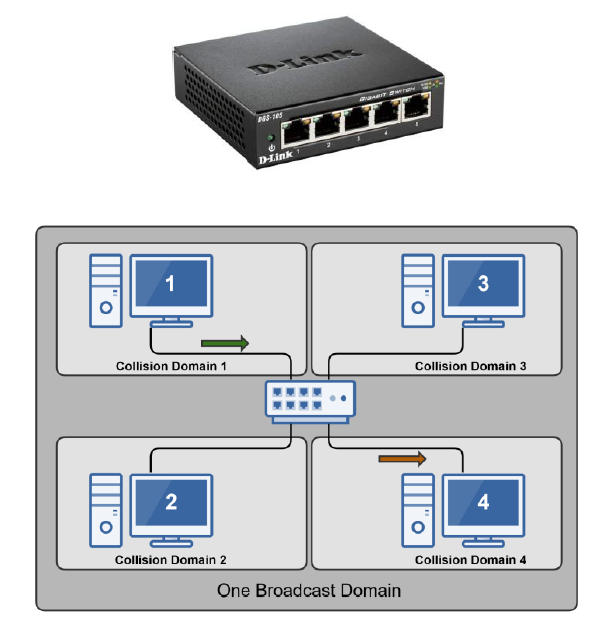

They are a central connecting device connecting devices just like a hub

Switch is an intelligent network device at OSI Layer Layer 2 (Data Link Layer) and at Physical Layer. Switch works with frames & bits. Switch may have uplink ports connecting to other switches. 

The goal of a switch is to transmit frames between devices within a network as fast as possible. It also verifies Frame Check Sequence (FCS/CRC) against the received frame, and it discards the frame if frame is corrupted.

## How does Network Switch Work? (Lecture 33 of Bogdan)

Memorizes the MAC Address if each device connected to it in **MAC address table**

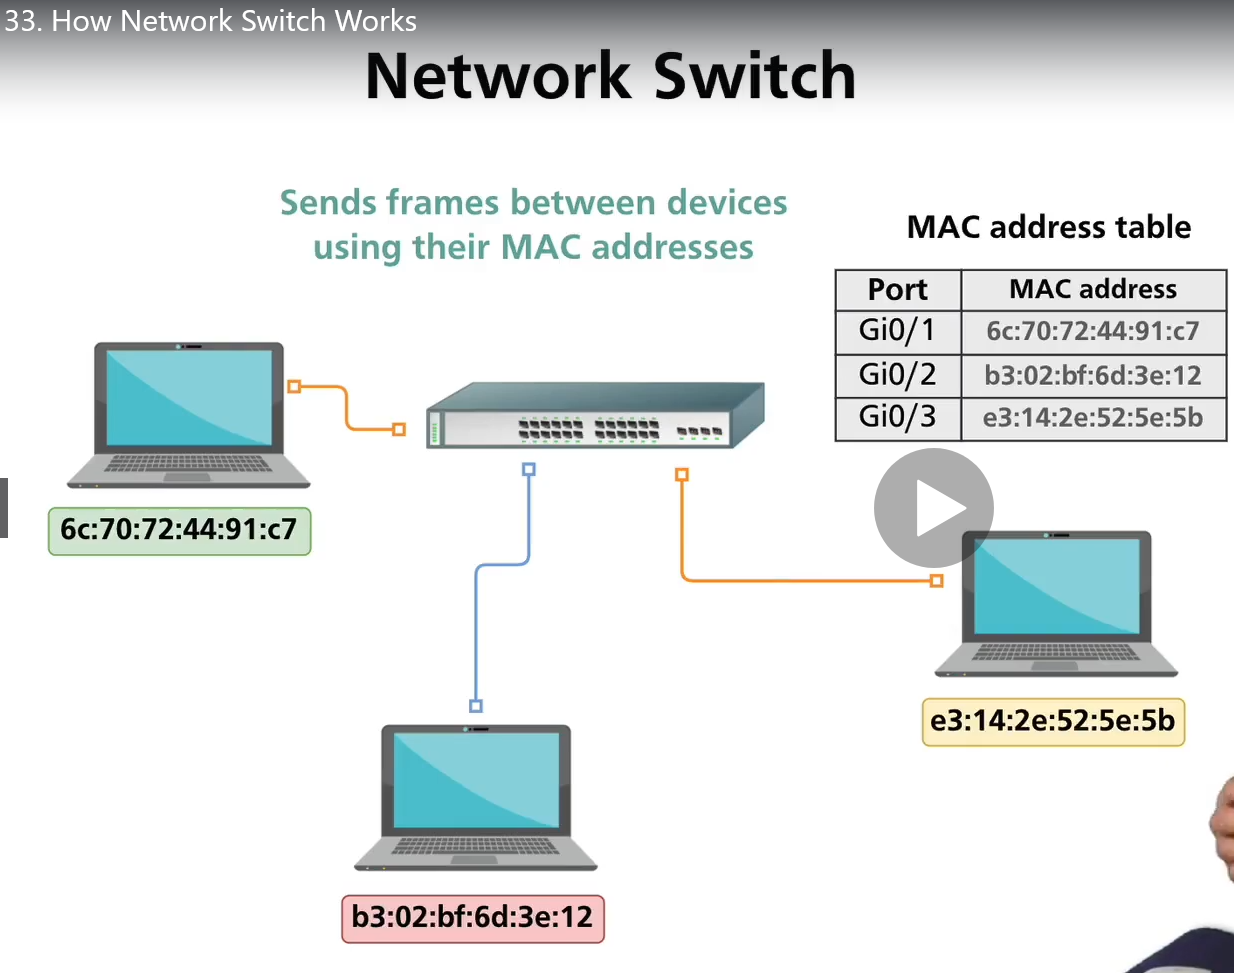

Pay attention to Source & Destination MAC addresses during communications process

Breaks up collosion domains:

- Traffic goes in one port and is repeated out to only destination port
- Designed for High Bandwith
- Standard in todays network infrastructure

Switch is more secure than a hub because traffic goes in one port and is repeated out to only the destination port

When using a switch, we still have one large broadcast domain/area, in which we can broadcast to all devices. In case of retrieving a dynamic IP address, the new device can send a broadcast message to the broadcast domain saying "Hey, is there a DHCP server available, can this server assign me an IP address?"

## Ethernet Frame Header (Lecture 34 of Bogdan)

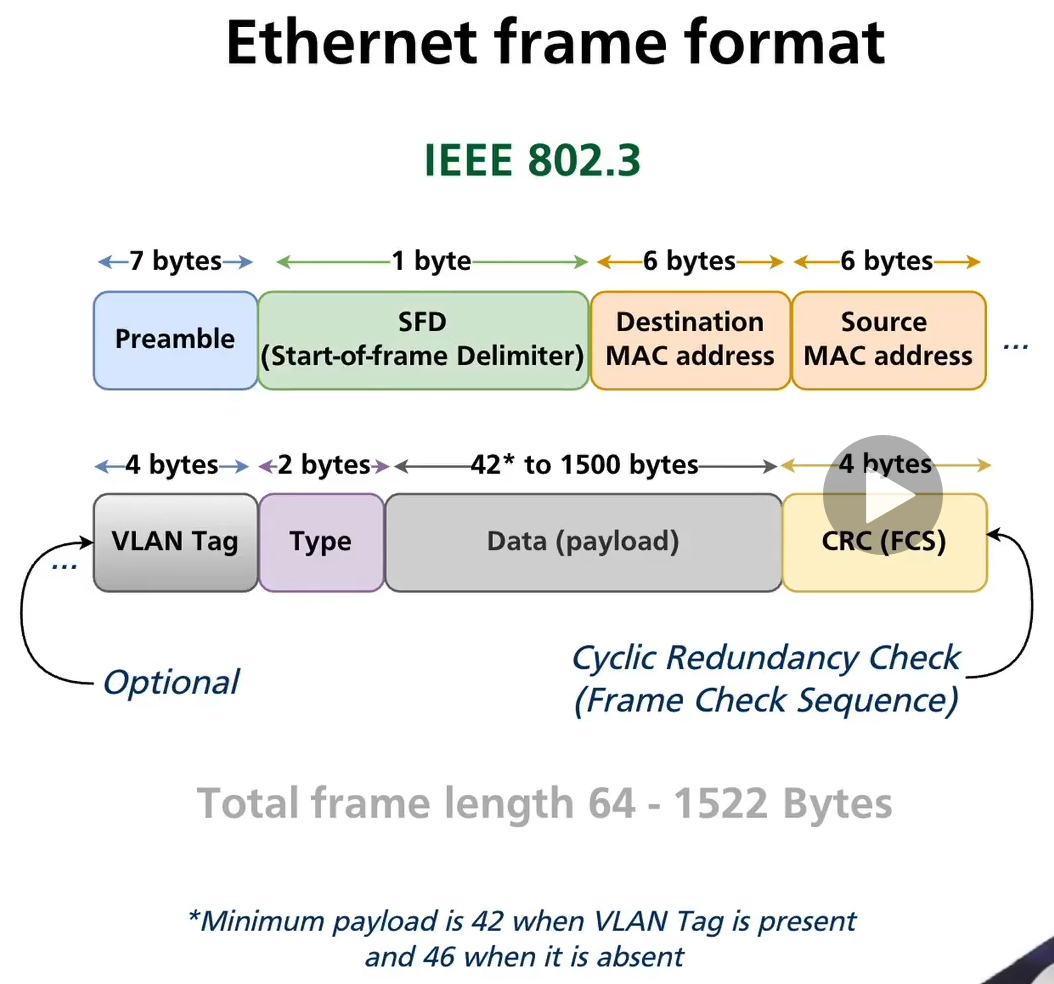

Ethernet frame header format is specified by the IEEE 802.3 (for wired connection such as copper or fibre) standard.

Preamble + SFD (10101011) are fixed portions of the frame. Preamble is used for syncronization of sender and receiver indicating that actual frame data will be sent.

VLAN stands for virtual LAN. We will talk about it later.

Type is 2 bytes long, which type of protocol is encapsulated next (e.g. IPv4 or IPv6). 

Data payload is internet layer's packet. Payload size differs for different applications and depends on the network characteristics like packet loss rate.

Cyclic Redundancy Check (a.k.a. Frame Check Sequence - FCS) is added to do error detection & correction; How FCS is constructed? At the sender, FCS/CRC is calculated based on destination MAC address, source MAC address, VLAN Tag (optional), Type and the Payload. The calculated FCS is added to the end of the frame (4 bytes). At the switch, FCS/CRC is re-calculated and if the calculated FCS/CRC is the same as the received FCS/CRC then the frame is forwarded. Otherwise, the frame is discarded.

## Types of Communication (Lecture 35 of Bogdan)

The types of communication is not only related to Data Link Layer, but also to Internet Layer too (???)

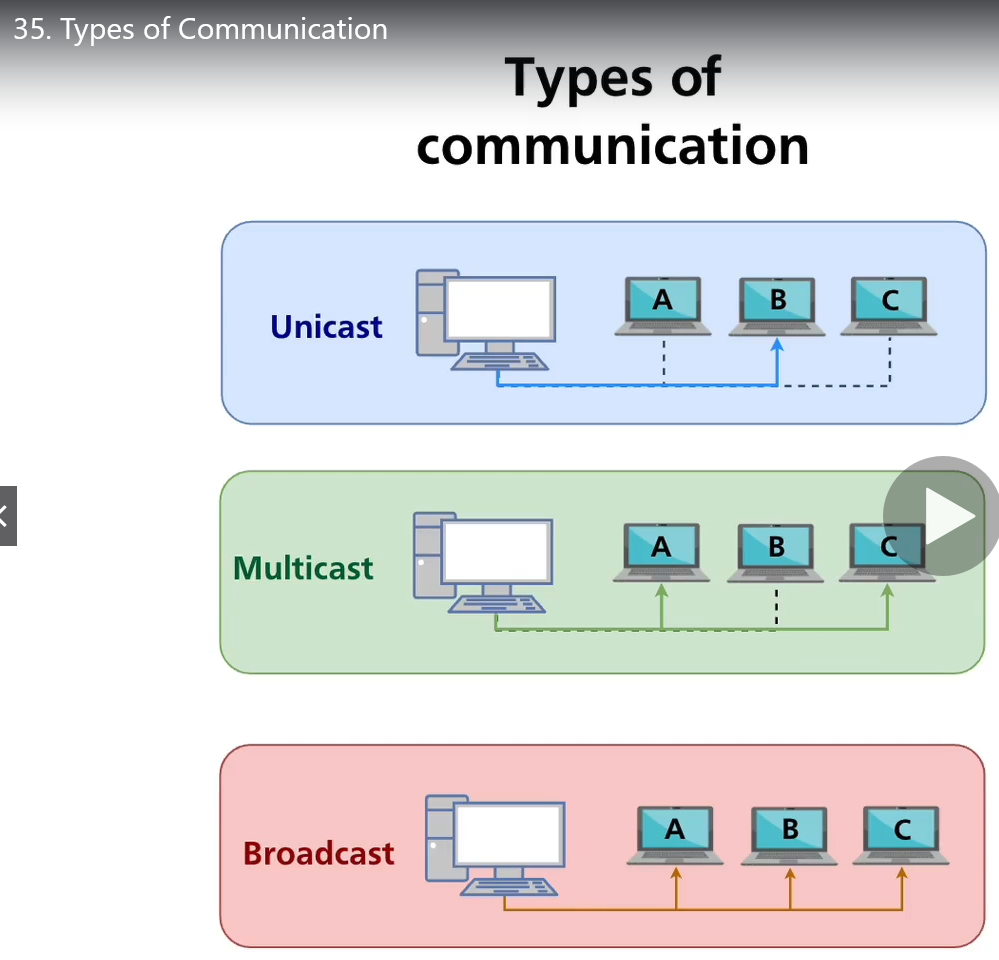

## Types of MAC addresses (Lecture 36 of Bogdan)

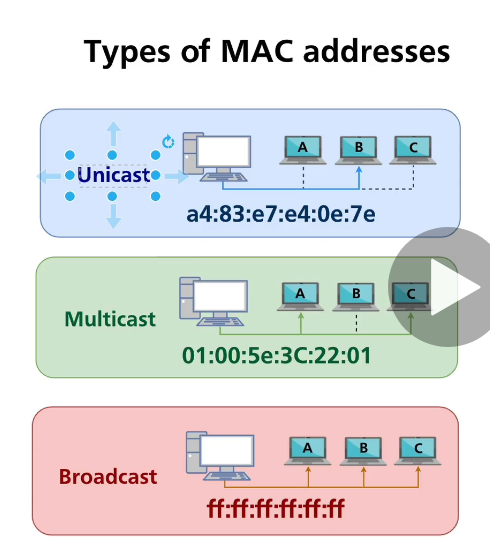

We have 3 types of MAC addresses:

- Unicast MAC address
- Multicast MAC address
- Broadcast MAC address

**In unicast communications we use unicast MAC addresses**. That is in the frame, we will have unique receiver's and sender's MAC addresses.

**The multicast communications use multicast MAC addresses**. Imagine a live streaming, where different subscribers are watching. There are **not** multiple copies of the same stream for each subscriber. Instead, the subscribers register to receive the stream. Then there is one stream to a **destination multicast address**. Also there is one multicast IP address mapped to a multicast MAC address. Note that all multicast MAC addresses start with **01:00:5e** OUI part.

**Broadcast MAC address** It is **ff:ff:ff:ff:ff:ff** by default. If a switch detects the broadcast MAC address, it will forward the frame to all ports except the port where the frame came from in the same switched network.

## Network Communication Types (Lecture 37 of Bogdan)

- Half duplex mode: Can send or receive data, but not at the same time
- Full duplex mode: Can send and receive data at the same time

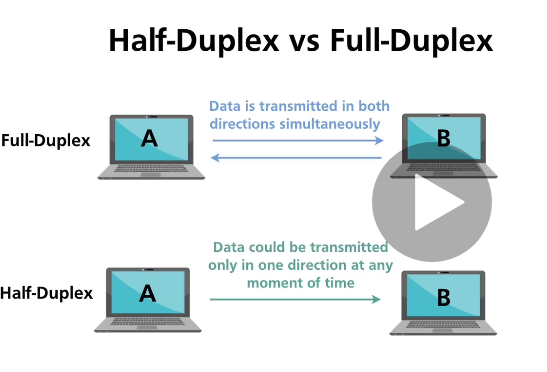

Imagine the connecting media is fiber. In full duplex mode, A sends data via cable 1 and B sends data via cable 2. Refer the fiber media having 2 seperate cables to support full duplex communication mode as below:

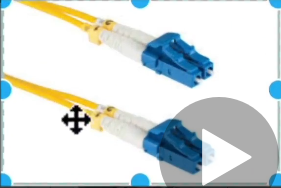

It is also possible to transmit data in full duplex mode using twisted pair cable, which has 4 pairs of twists. Each pair can be used either for Tx or Rx in full duplex mode.

In **half duplex** mode, if there are more than two devices connected to the same physical media at the same time, only one device can send and the others must listen. IEEE.11a, 11n, 11ac work exclusively in half duplex.

## Collision in Physical Layer (Lecture 38 of Bogdan)

When two devices tries to transmit the data in half duplex case, then collision happens.

Collisions happen in twister pair or over the air. Fiber cables operate in full duplex mode.

Collusion 802.3 and 802.11 standards describe the collision and what happens when collision happens.



## Collusion handling mechanism in Half duplex mode (Lecture 39 of Bogdan)

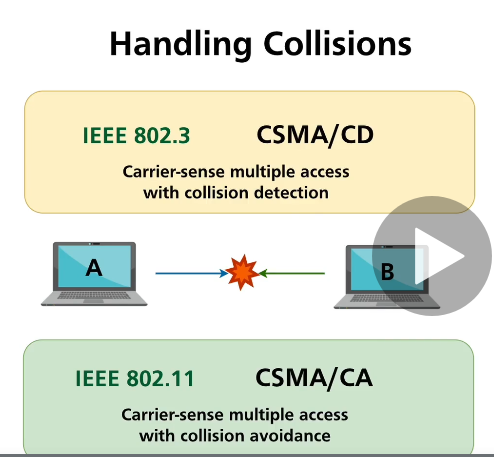

- Carrier sense multiple access: listen to the shared media, if there is no transmission, then start transmitting the frames.

- CD: As specified in **802.3**; If collusion happens, all devices becomes silent. The amount of time to remain silent per device is random. If the collision happens again the procedure repeats. As you see, in CA, every device in the media handles the collosion independently; distributed collosion handling

- CA: specified in **802.11a, 802.11n**. Devices utilizing the shared media collectively decide who sends when. The shared media is managed collectively by the devices. 

In wireless networks, the communication can only be half-duplex; the media must be managed by the connected devices and hence CSMA/CA collision detection mechanism is used.

## Collision Domains (Lecture 41 of Bogdan)

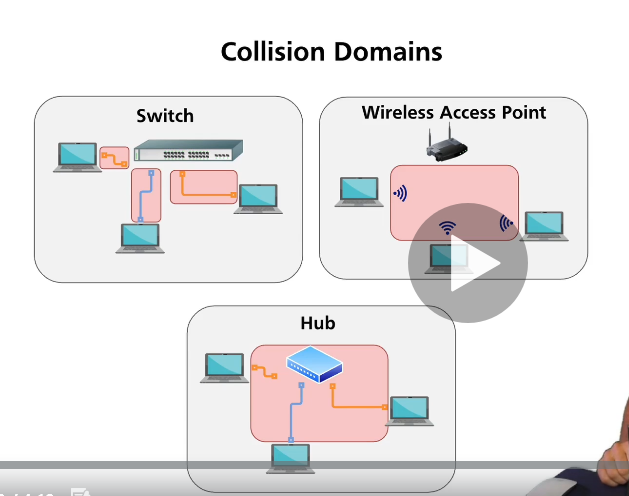

**Collision domain** defines define the part of the network, where collision can happen.

In Wirless Access Point case, all devices in the network must decide what common collision avoidance mechanism to use the shared media.

## Negotiation of speed & duplex mode (Lecture 42 of Bogdan)

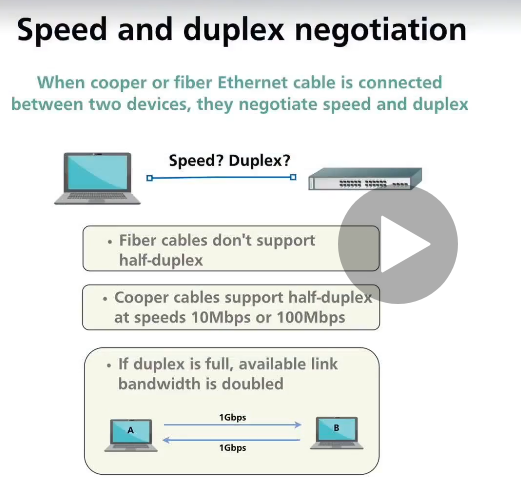

Note that **half-duplex** is not desirable due to the collisions it can have. 

## Analyzing Unicast Ethernet Frame Headers via Wireshark (Lecture 42 of Bogdan)

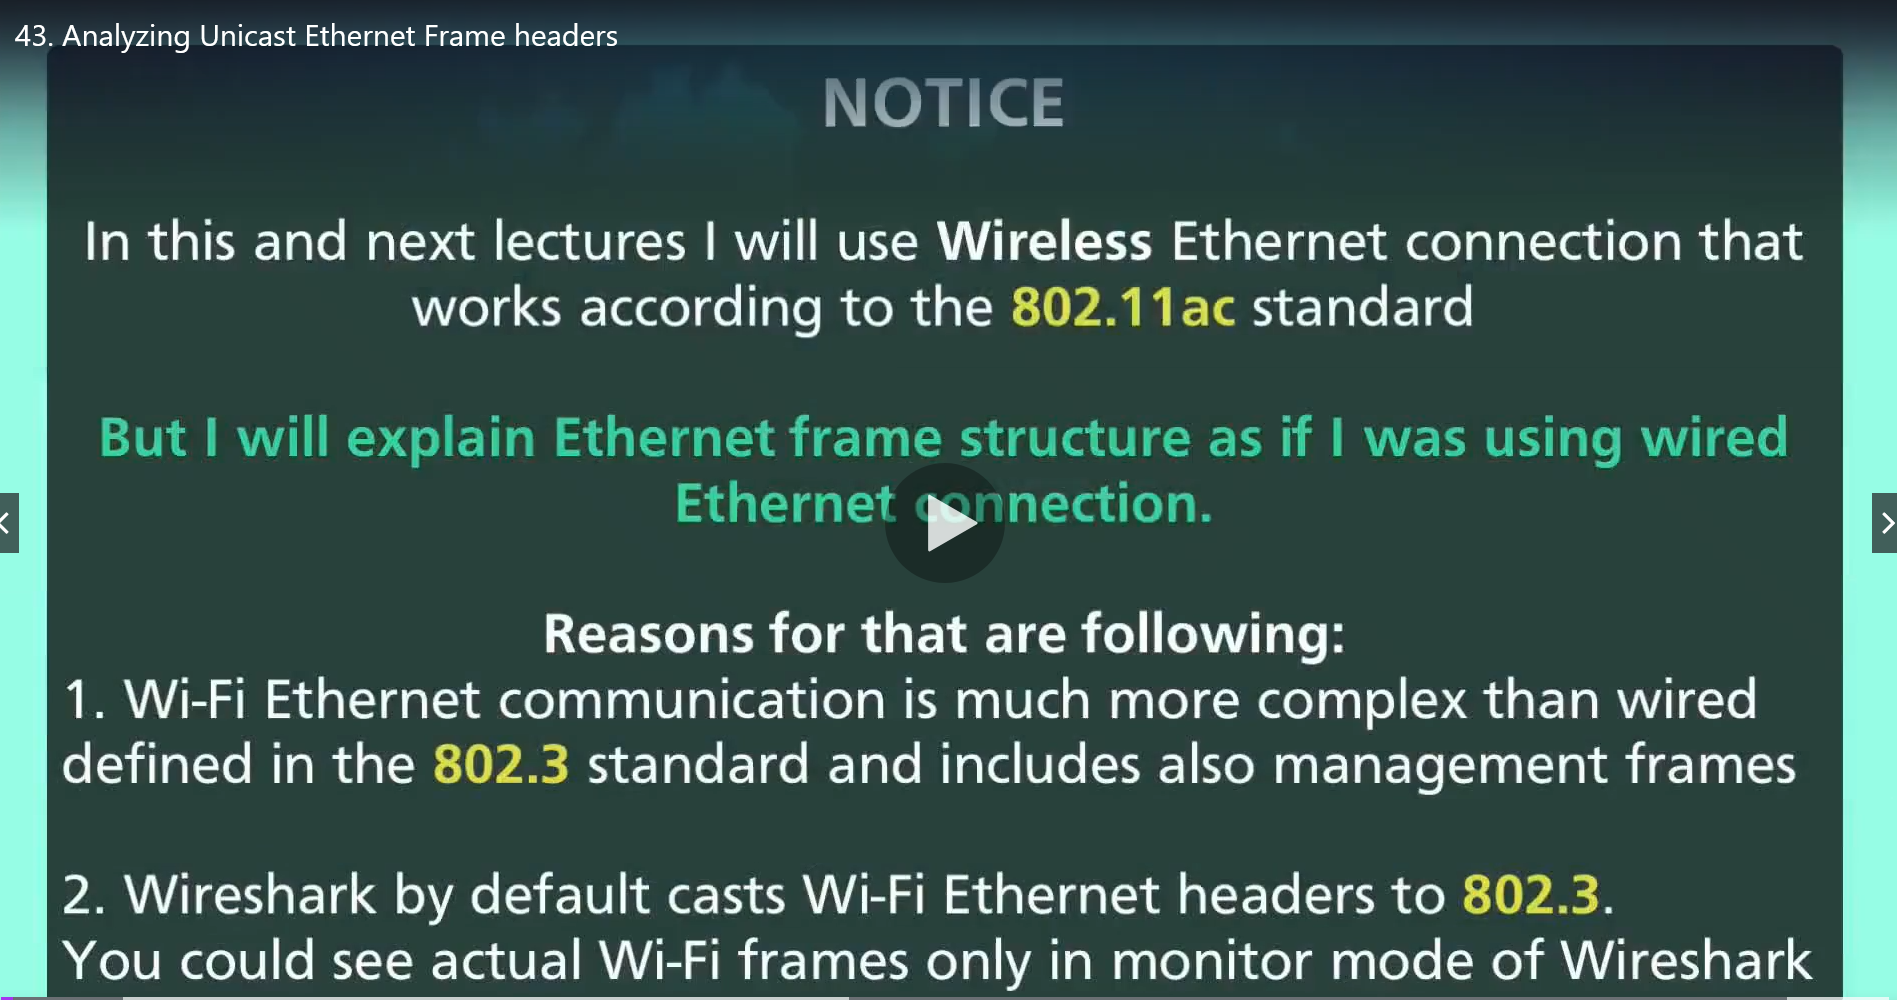

Notice that in our case we use a wireless ethernet connection that works according to 802.11n standard.

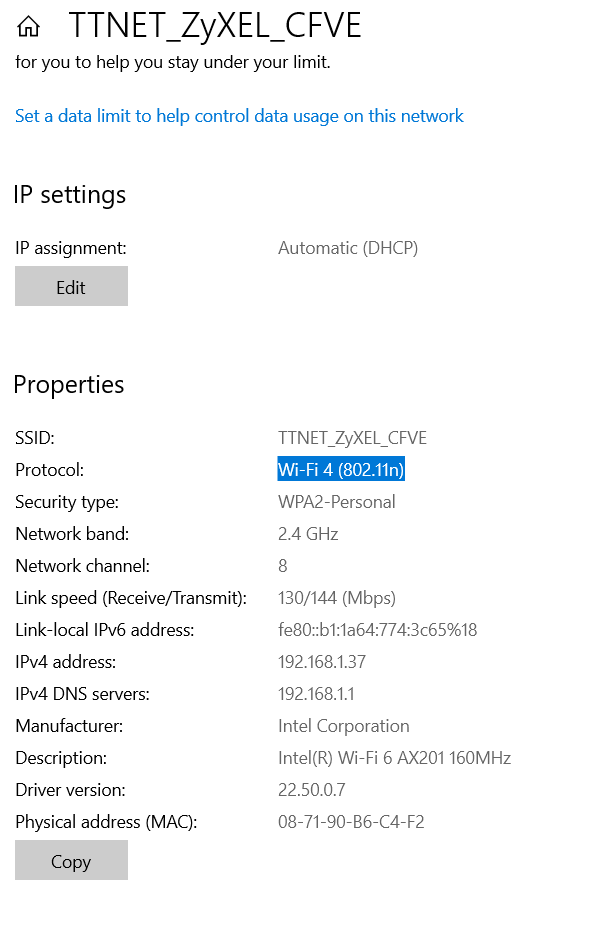

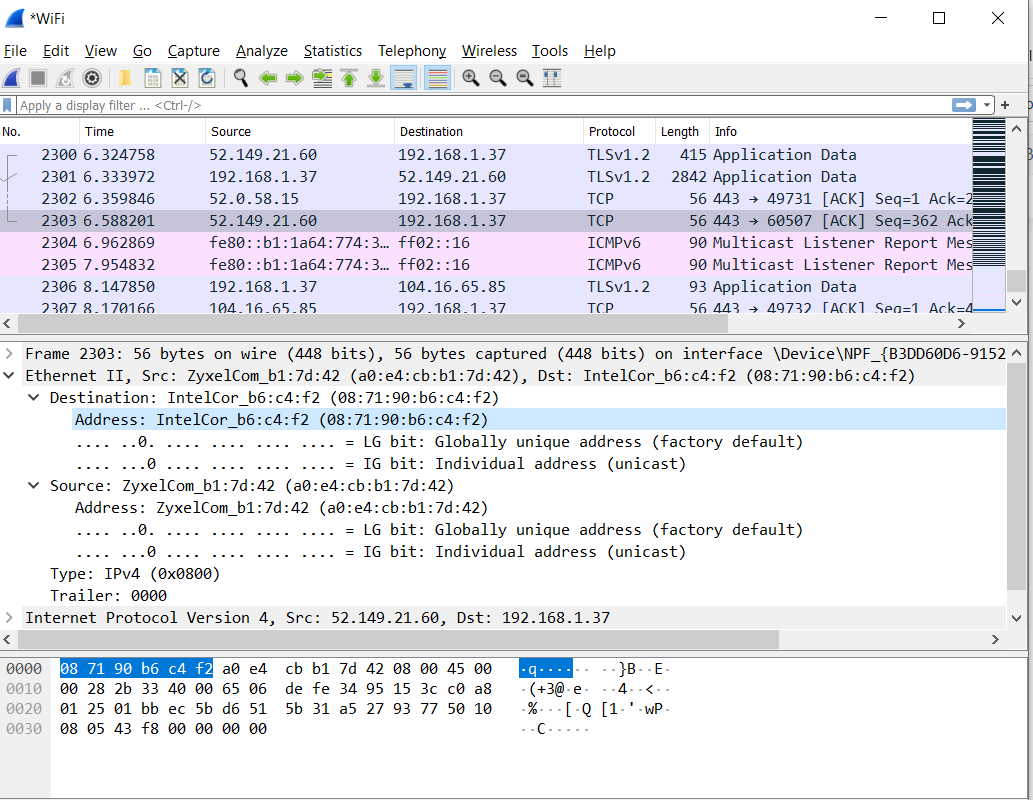

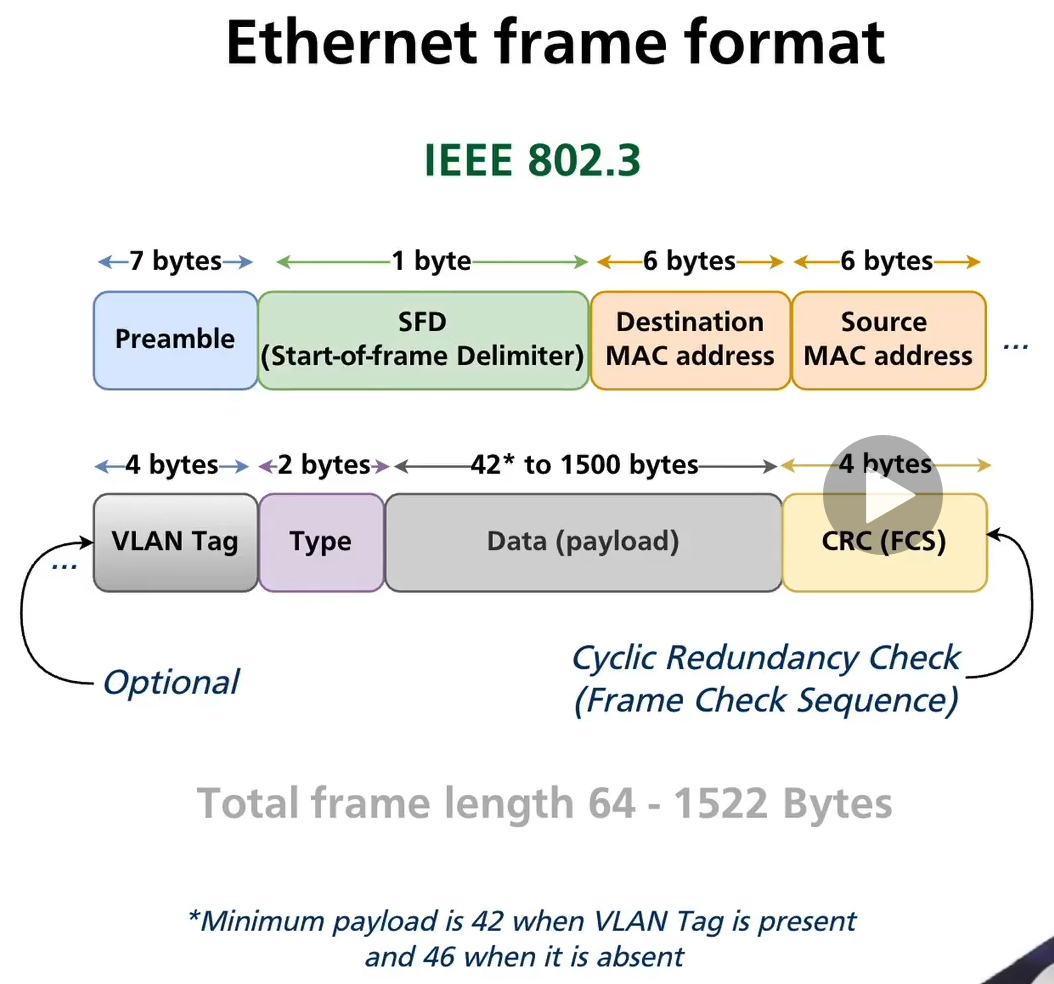

Note that we can check the MAC address in Windows of the wireless LAN adapter Wifi using **ipconfig /all** command:

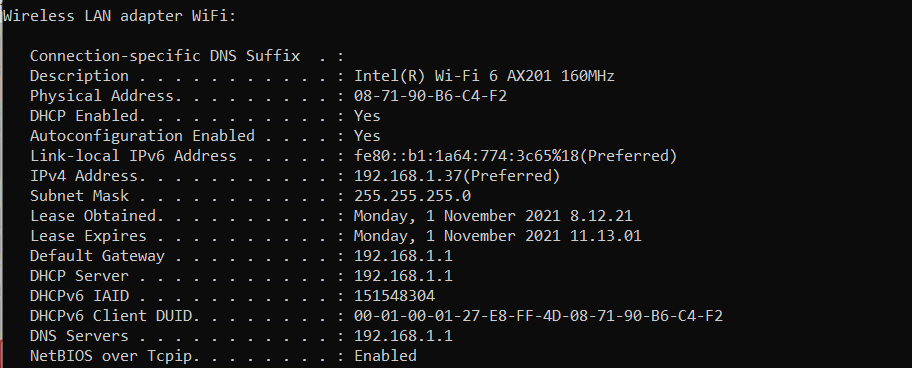

As you see the physical MAC address of the Wifi NIC in the laptop is **08-71-90-B6-C4-72**; The OUI part is specific; The first byte in OUI tells whether MAC address is globally unique and unicast MAC address;

- 0x08 = .... ..0.  => 7.th bit being 0 means globally unique address
- 0x08 = .... ...0  => 8.th bit being 0 means unicast MAC address

Referring to the capture of wireshark; Preamble & SFD are not shown in wireshark. We also see that we have destination MAC address and source MAC address. We have OUIs identified in the capture. **IntelCor_b6** for the laptop and **ZyxelCom_b1** for the WAP. The optional WLAN tag is absent in the frame. **Type** field in the frame is set to have IPv4, which means the data/payload in the frame is a IPv4 packet. CRC/FCS is not shown in Wireshark.







## Analyzing Broadcast Internet Frames Using Wireshark (Lecture 44 of Bogdan)